In [97]:
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm=ChatGroq(model="llama-3.1-8b-instant")

result=llm.invoke("HEllo!")
result


AIMessage(content="Hello! It's nice to meet you. Is there something I can help you with or would you like to chat?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 25, 'prompt_tokens': 39, 'total_tokens': 64, 'completion_time': 0.024562443, 'prompt_time': 0.002364154, 'queue_time': 0.074088476, 'total_time': 0.026926597}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_28116a6b5f', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--d989a636-9673-41e0-b891-b01562c7e911-0', usage_metadata={'input_tokens': 39, 'output_tokens': 25, 'total_tokens': 64})

In [98]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
class State(TypedDict):
    topic:str
    character:str
    settings:str
    premises:str
    story_intro:str

In [99]:
def generate_characters(state:State):
    """Generate character description"""
    msg=llm.invoke(f"Create two character names and breif traits for a story about {state['topic']}")
    return {"character":msg.content}

def generate_setting(state:State):
    """Generate a story setting"""
    msg=llm.invoke(f"Describe a vivid settings for a story about {state['topic']}")
    return {"settings":msg.content}

def generate_premise(state:State):
    """Generate a story premise"""
    msg=llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {"premises":msg.content}

def combine_elements(state:State):
    msg=llm.invoke(
        f"Write a short introduction using these elements :\n"
        f"Character:{state['character']}\n"
        f"Settings:{state['settings']}\n"
        f"Premise:{state['premises']}"
    )
    return {"story_intro":msg.content}

In [100]:
graph=StateGraph(State)
graph.add_node("character",generate_characters)
graph.add_node("setting",generate_setting)
graph.add_node("premise",generate_premise)
graph.add_node("combine",combine_elements) 
from IPython.display import Image,display


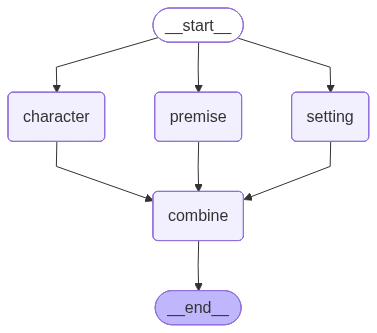

In [101]:

graph.add_edge(START,"character")
graph.add_edge(START,"setting")
graph.add_edge(START,"premise")
graph.add_edge("character","combine")
graph.add_edge("setting","combine")
graph.add_edge("premise","combine")
graph.add_edge("combine",END)

compiled_graph= graph.compile()
graph_image=compiled_graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [102]:
tate={"topic":"Space Adventure"}
res=compiled_graph.invoke(state)
res

{'topic': 'Space Adventure',
 'character': "Here are two character names and brief traits for a space adventure story:\n\n**1. Captain Lyra Blackwood**\n\n- Age: 32\n- Nationality: American\n- Species: Human\n- Personality: Brave, Resourceful, and Charismatic\n- Skills: Expert Pilot, Skilled Navigator, and Talented Engineer\n- Background: Lyra is a seasoned space explorer with years of experience in navigating the galaxy. She's known for her exceptional leadership skills and unwavering dedication to her crew.\n\n**2. Dr. Kael Jensen**\n\n- Age: 28\n- Nationality: Danish\n- Species: Human\n- Personality: Curious, Analytical, and Loyal\n- Skills: Expert in Exoplanetary Biology, Astrophysics, and Alien Communication\n- Background: Kael is a brilliant scientist who specializes in the study of alien life forms. He's always eager to uncover new discoveries and is fiercely loyal to Lyra and the crew.\n\nThese two characters will likely work together to explore the galaxy, overcome challenges,

In [103]:
print(res["character"])

Here are two character names and brief traits for a space adventure story:

**1. Captain Lyra Blackwood**

- Age: 32
- Nationality: American
- Species: Human
- Personality: Brave, Resourceful, and Charismatic
- Skills: Expert Pilot, Skilled Navigator, and Talented Engineer
- Background: Lyra is a seasoned space explorer with years of experience in navigating the galaxy. She's known for her exceptional leadership skills and unwavering dedication to her crew.

**2. Dr. Kael Jensen**

- Age: 28
- Nationality: Danish
- Species: Human
- Personality: Curious, Analytical, and Loyal
- Skills: Expert in Exoplanetary Biology, Astrophysics, and Alien Communication
- Background: Kael is a brilliant scientist who specializes in the study of alien life forms. He's always eager to uncover new discoveries and is fiercely loyal to Lyra and the crew.

These two characters will likely work together to explore the galaxy, overcome challenges, and unravel the mysteries of space.


In [105]:
print(res["settings"])

**Galactic Horizon: The Starlight Oasis**

As the spaceship, "Aurora's Hope," emerged from the swirling vortex of a wormhole, the crew was met with a breathtaking sight. The stars twinkled like diamonds against the inky blackness of space, and the galaxy unfolded before them like a vast, cosmic tapestry.

The ship drifted towards the planet Zara-Xylophia-IV, a distant world shrouded in an ethereal mist. The airlock creaked open, and a hiss of pressure equalized as the crew prepared to exit the ship. The hatch swung wide, revealing a shimmering veil of iridescent gases that danced like a spectral aurora.

As they stepped onto the planet's surface, the crew was enveloped by a warm, golden light that seemed to emanate from the very rocks themselves. The landscape unfolded before them, a tapestry of glittering crystals, shimmering waterfalls, and undulating dunes of a substance that looked almost like liquid silver.

In the distance, a range of crystal spires rose from the ground, their fa

In [106]:
print(res['story_intro'])

As the spaceship "Aurora's Hope" descended onto the uncharted planet of Zara-Xylophia-IV, Captain Lyra Blackwood stepped out of the airlock, her eyes scanning the breathtaking vista before her. The landscape shimmered and danced in the golden light that seemed to emanate from the very rocks themselves. The air was alive with a sweet, musical hum, and the scent of ozone and something sweetly floral wafted through the air, leaving Lyra with a sense of wonder and awe.

"Captain, we're reading some strange energy signatures coming from the crystal spires," reported Dr. Kael Jensen, who stood beside Lyra, his eyes fixed on the readings on his console. "It's unlike anything we've seen before. I think we should investigate further."

Lyra nodded, her mind racing with possibilities. She had always been drawn to the unknown, and this planet seemed to be full of secrets waiting to be uncovered. She turned to her crew, her voice carrying across the landscape. "Alright, let's gear up and get movin